Import packages

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [3]:
from sklearn.datasets import load_boston

In [ ]:
df_boston= load_boston()

In [12]:
df_boston.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [15]:
## Lets check the descriptin 
print(df_boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [16]:
print(df_boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [22]:
print(df_boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Preparing the Data set for analysis

In [31]:
column_names=df_boston.feature_names

In [32]:
dataset_boston=pd.DataFrame(df_boston.data,columns=column_names)

In [34]:
dataset_boston['Target_Priced']=df_boston.target

In [36]:
dataset_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target_Priced
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [37]:
dataset_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CRIM           506 non-null    float64
 1   ZN             506 non-null    float64
 2   INDUS          506 non-null    float64
 3   CHAS           506 non-null    float64
 4   NOX            506 non-null    float64
 5   RM             506 non-null    float64
 6   AGE            506 non-null    float64
 7   DIS            506 non-null    float64
 8   RAD            506 non-null    float64
 9   TAX            506 non-null    float64
 10  PTRATIO        506 non-null    float64
 11  B              506 non-null    float64
 12  LSTAT          506 non-null    float64
 13  Target_Priced  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [38]:
dataset_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target_Priced
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Check the missing values

In [40]:
dataset_boston.isna().sum()

CRIM             0
ZN               0
INDUS            0
CHAS             0
NOX              0
RM               0
AGE              0
DIS              0
RAD              0
TAX              0
PTRATIO          0
B                0
LSTAT            0
Target_Priced    0
dtype: int64

In [41]:
dataset_boston.isnull().sum()

CRIM             0
ZN               0
INDUS            0
CHAS             0
NOX              0
RM               0
AGE              0
DIS              0
RAD              0
TAX              0
PTRATIO          0
B                0
LSTAT            0
Target_Priced    0
dtype: int64

# Exploratory Data Analysis

In [49]:
corr=dataset_boston.corr()

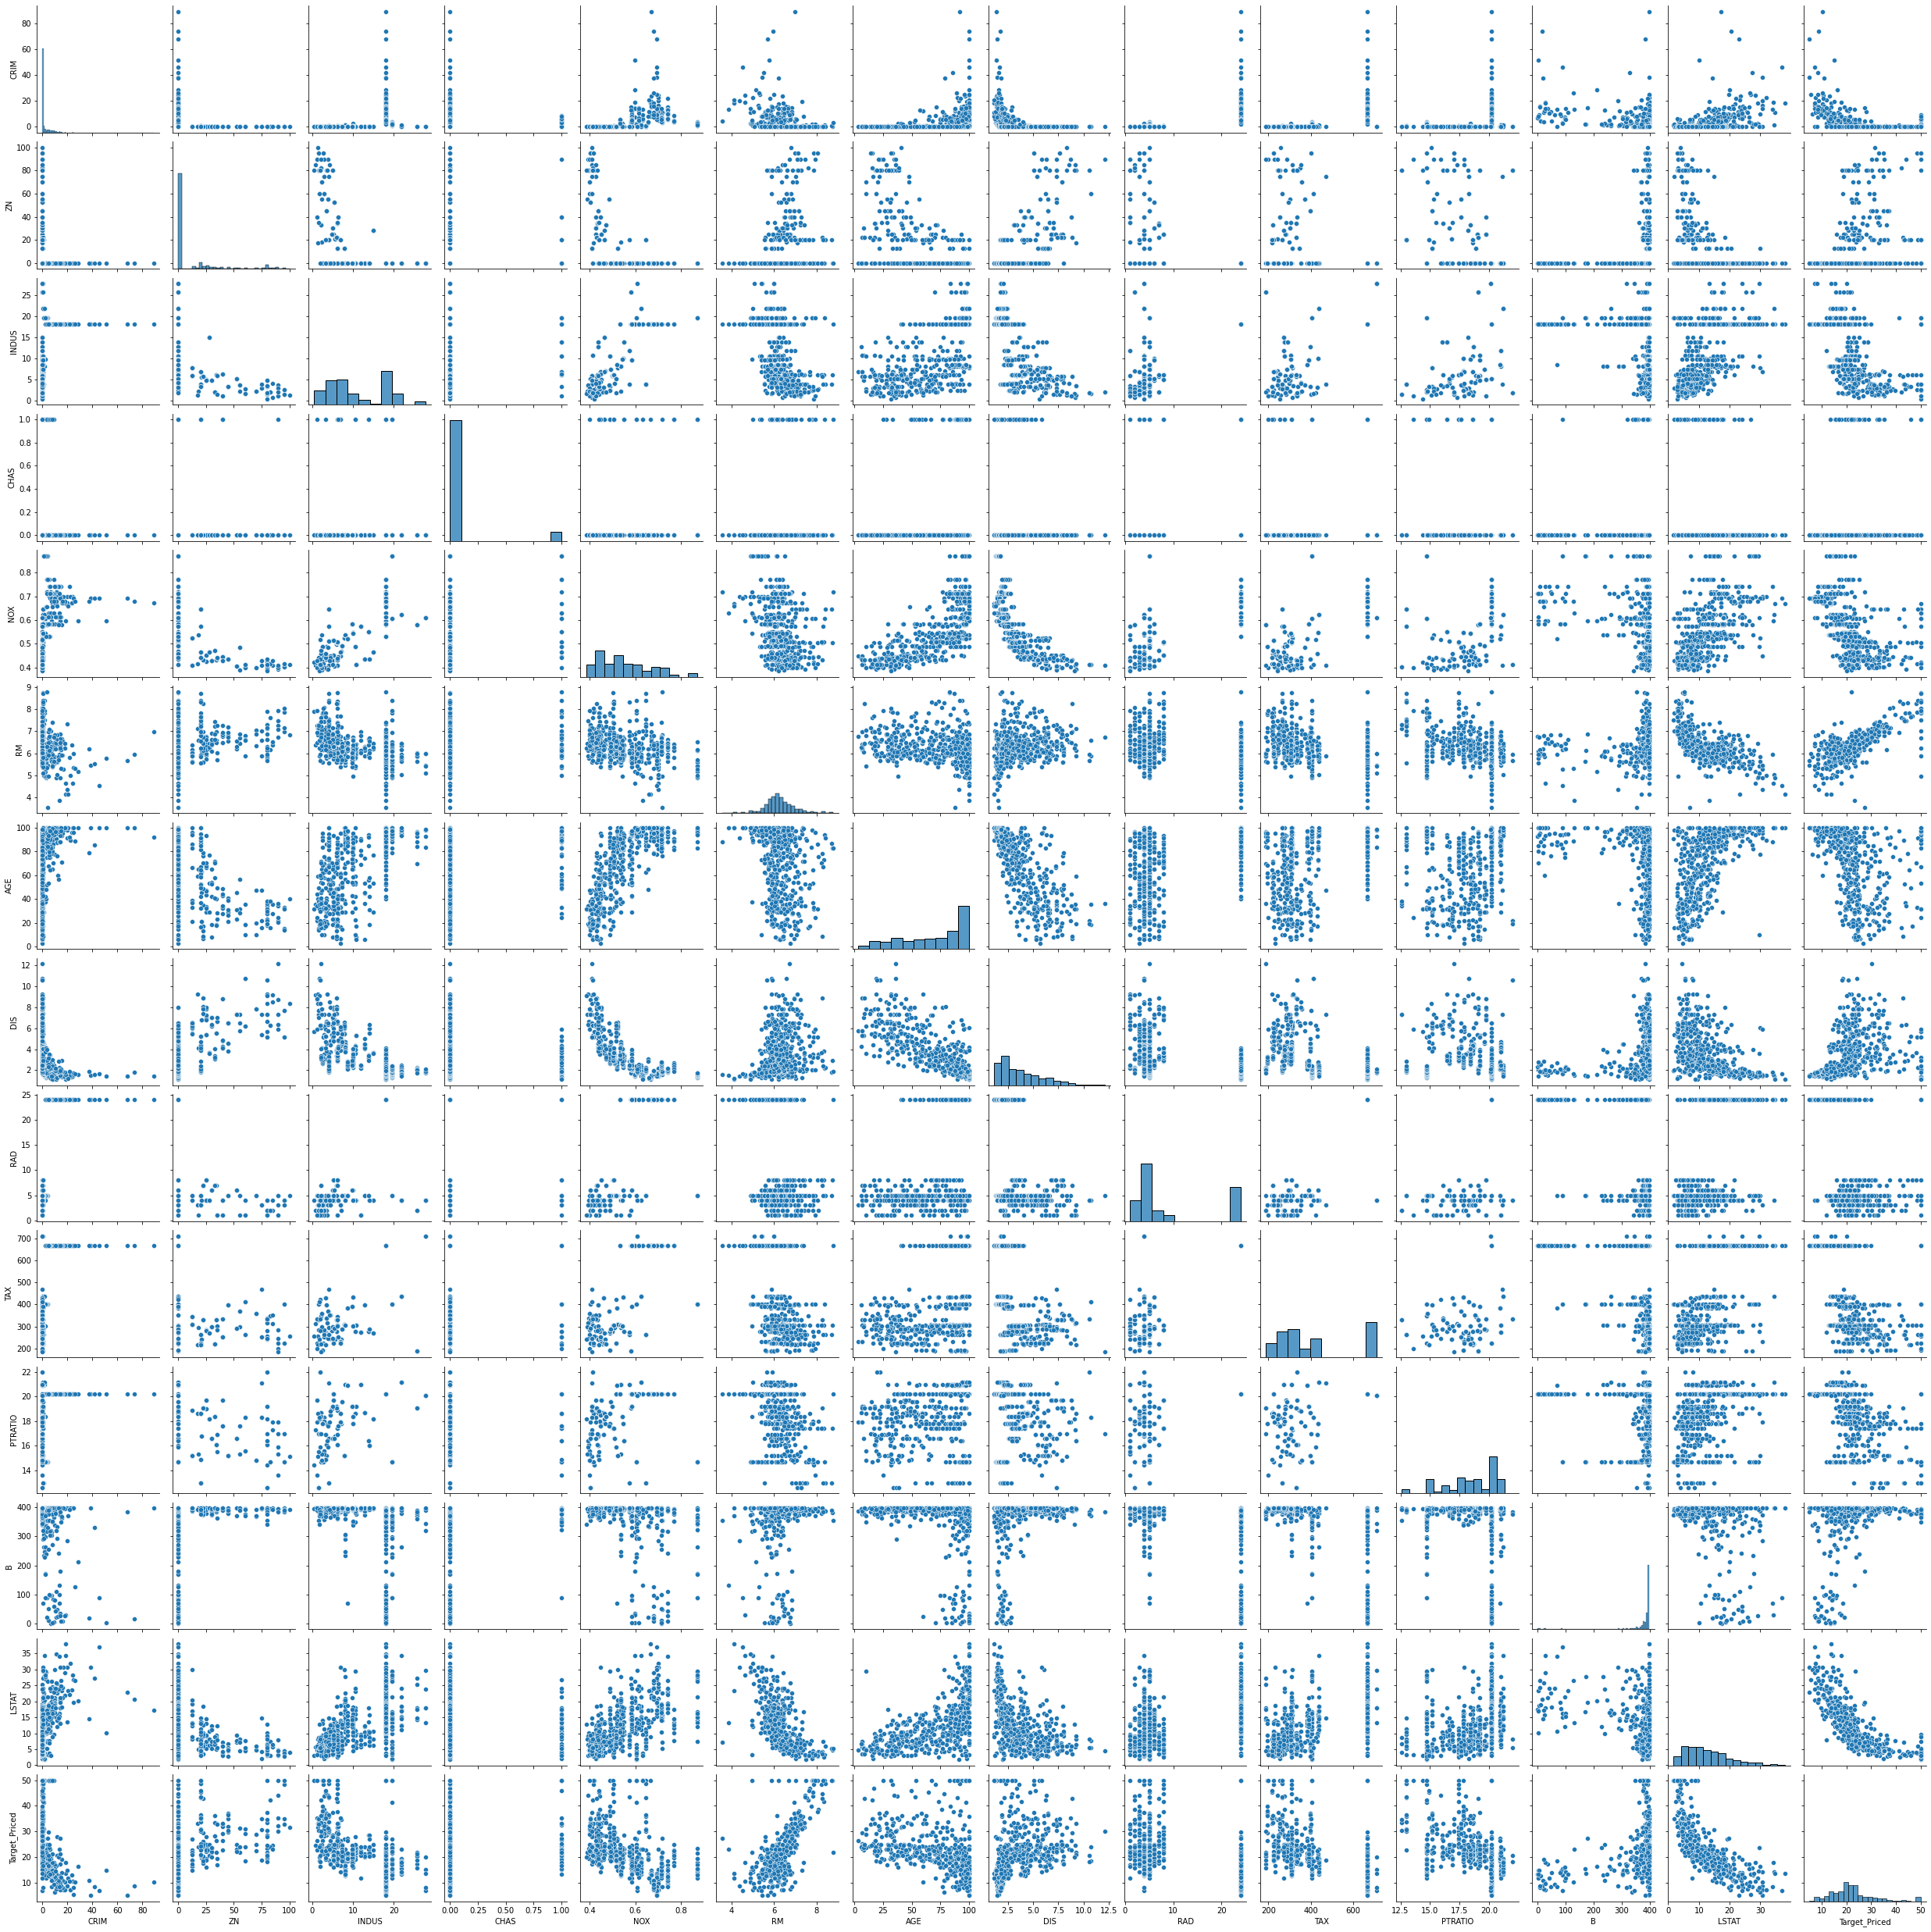

In [47]:
sns.pairplot(dataset_boston)

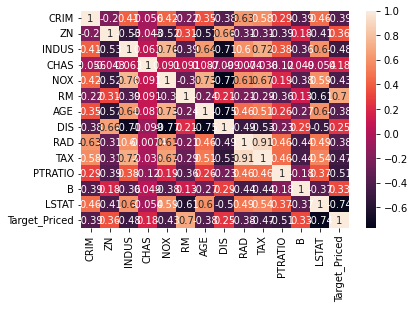

In [52]:
import seaborn as sns

sns.heatmap(corr,annot=True)

Text(0.5, 0, 'Target Price')

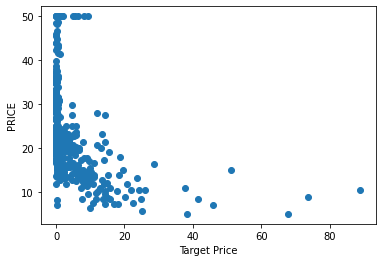

In [54]:
plt.scatter(dataset_boston['CRIM'],dataset_boston['Target_Priced'])
plt.ylabel('PRICE')
plt.xlabel('Crime Rate')

Text(0.5, 0, 'Room Number')

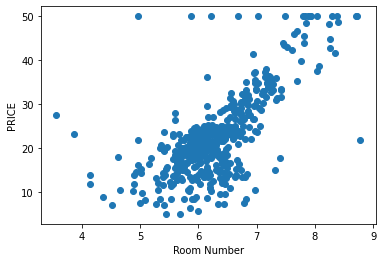

In [55]:
plt.scatter(dataset_boston['RM'],dataset_boston['Target_Priced'])
plt.ylabel('PRICE')
plt.xlabel('Room Number')

Simple Linear regression between RM and Price of the house

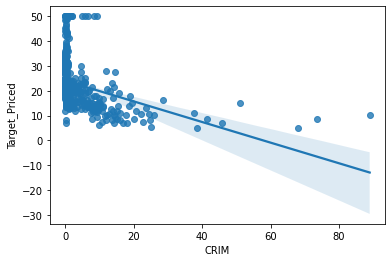

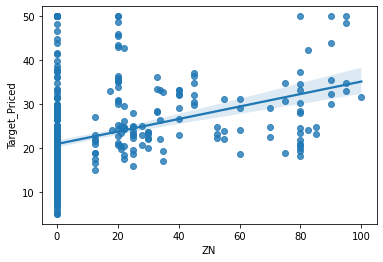

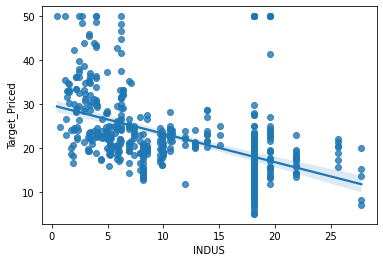

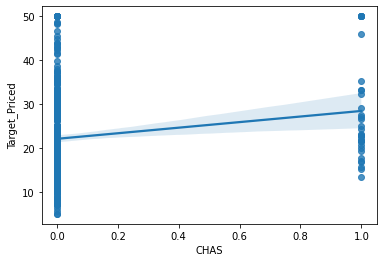

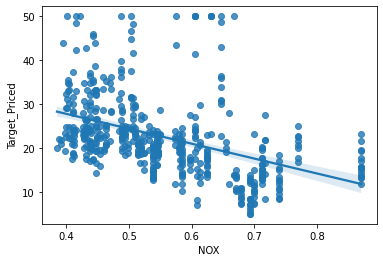

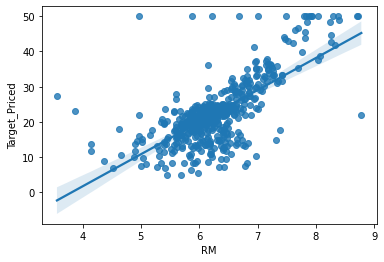

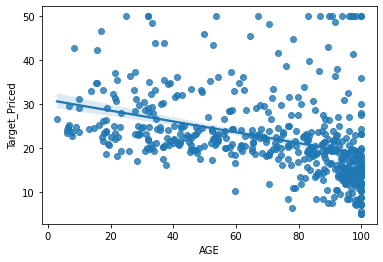

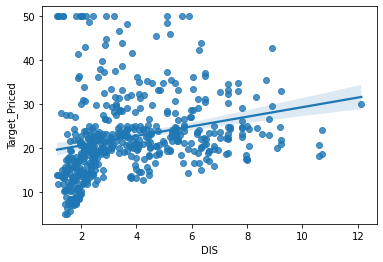

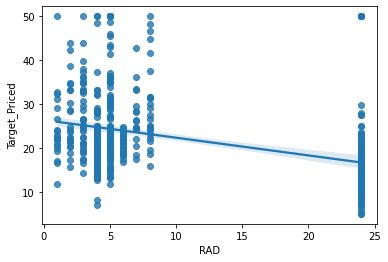

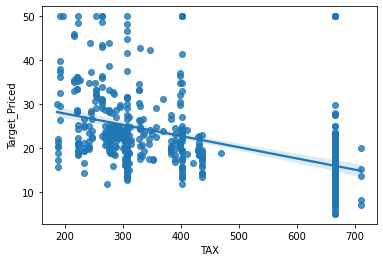

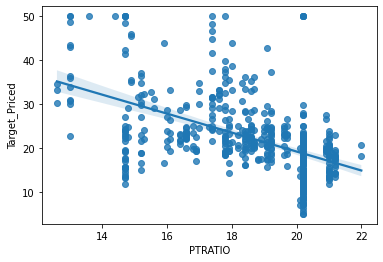

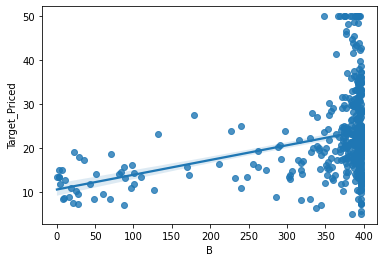

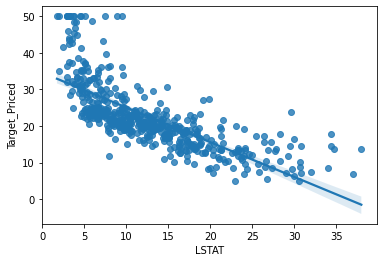

In [64]:
for i in column_names:
  sns.regplot(x=i,y='Target_Priced',data=dataset_boston)
  plt.show()


# Data Preparation for modelling


In [77]:
X=dataset_boston.iloc[:,:-1]
y=dataset_boston.iloc[:,-1]

Splitting the dataset as training and testing dataset

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.30,random_state=42)

Standardizing the data

In [105]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)

# Model training

In [106]:
from sklearn.linear_model import  LinearRegression

regression=LinearRegression()

In [108]:
regression.fit(X_train,Y_train)

LinearRegression()

In [109]:
regression.coef_

array([-1.10834602,  0.80843998,  0.34313466,  0.81386426, -1.79804295,
        2.913858  , -0.29893918, -2.94251148,  2.09419303, -1.44706731,
       -2.05232232,  1.02375187, -3.88579002])

In [111]:
regression.intercept_

23.01581920903955

In [110]:
## On which parameter the model has been trained
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

Prediction

In [112]:
y_predict=regression.predict(X_test)

Plot scatter plot for the prediction and x_test

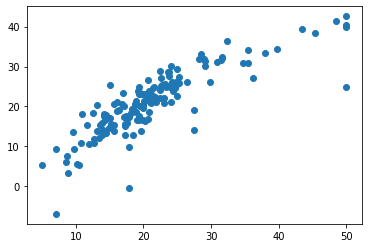

In [113]:
plt.scatter(Y_test,y_predict)

In [114]:
#residual Plot 

residuals= Y_test-y_predict

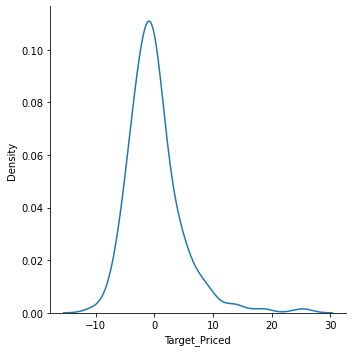

In [115]:
sns.displot(residuals,kind="kde")

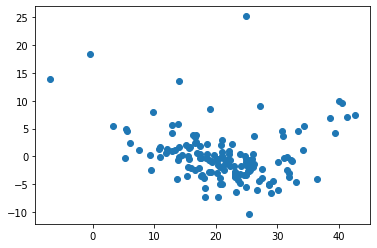

In [117]:
# Uniform distribution 
plt.scatter(y_predict,residuals)

In [120]:
from sklearn.metrics import mean_absolute_error,accuracy_score,roc_auc_score,mean_squared_error

print("Mean Squared Error " , mean_squared_error(Y_test,y_predict))
print("The Mean Absolute Error is " ,mean_absolute_error(Y_test,y_predict))

Mean Squared Error  21.517444231177212
The Mean Absolute Error is  3.162709871457406


R2 and Adjusted R2



In [127]:
from sklearn.metrics import r2_score

r_square_score=r2_score(Y_test,y_predict)

In [131]:
# lets calculate the adjusted r2
adj_r2=1 - (1-r_square_score)*(len(y)-1)/(len(y)-X.shape[1]-1)


# New Data Prediction

In [134]:
df_boston.data[1].reshape(1,-1)

array([[2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]])

In [135]:
val=scaler.transform(df_boston.data[1].reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [136]:
regression.predict(val)

array([24.90986918])

# Pickle the model

In [137]:
import pickle

In [152]:
pickle.dump(regression,open('regmodelsample.pkl','wb'))

In [153]:
pickled_model=pickle.load(open('regmodelsample.pkl','rb'))

In [158]:
pickled_model.predict(val)

array([24.90986918])